In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
import glob

diffraction_files = glob.glob('../../data/diffraction_noise/*.dat')

In [4]:
diffractions = [np.fromfile(diffraction_file, dtype=np.uint16) for diffraction_file in diffraction_files]
N = int(math.sqrt(diffractions[0].shape[0]))
diffraction_num = len(diffractions)
diffractions = np.array([df.reshape((N, N)) for df in diffractions])

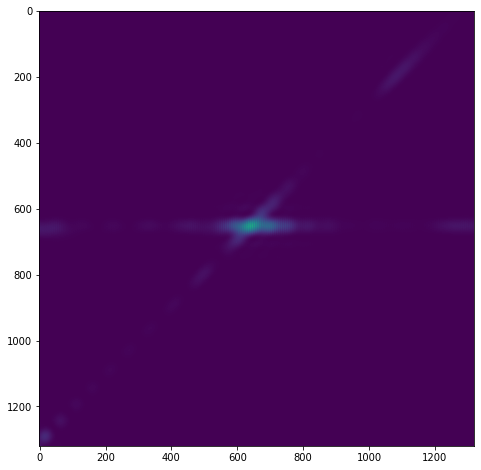

In [22]:
K = 1320

plt.figure(figsize=(8, 8))
plt.imshow(diffractions[0][(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])

In [23]:
diffractions = [diffraction[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)] for diffraction in diffractions]

(1320, 1320)


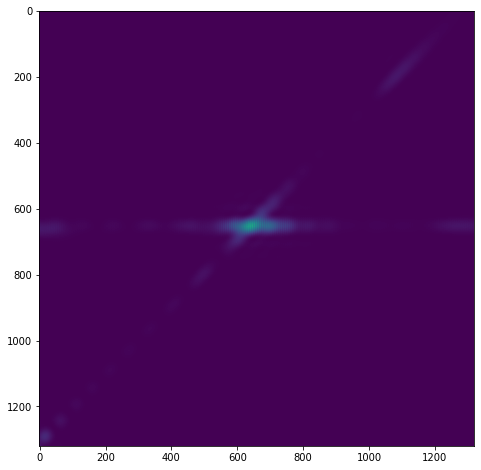

In [25]:
average = np.sum(diffractions, axis=0) / diffraction_num
print(average.shape)

plt.figure(figsize=(8, 8))
plt.imshow(average)

41377.0
0.0
135.08547692837467
12.266666666666667
808191.6647993135
898.9948079935242
3446


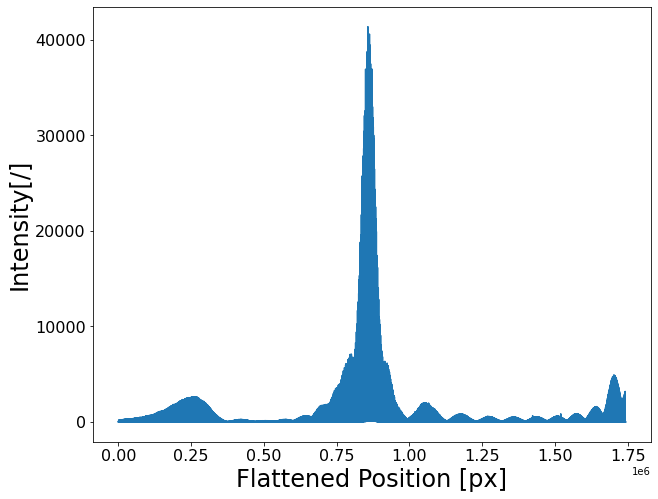

In [28]:
# 平均化された回折パターンを見る

print(np.max(average))
print(np.min(average))
print(np.mean(average))
print(np.median(average))
average_mean = np.mean(average)
average_variance = np.mean((average - average_mean)**2)
average_deviation = math.sqrt(average_variance)
print(average_variance)
print(average_deviation)
print(np.sum(average > 10000))

fig = plt.figure(figsize=(10, 8))
average_ravel = average.ravel()
plt.plot(average_ravel)
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
#fig.savefig('../../thesis/chap5/figure/diffraction_average_ravel.png')

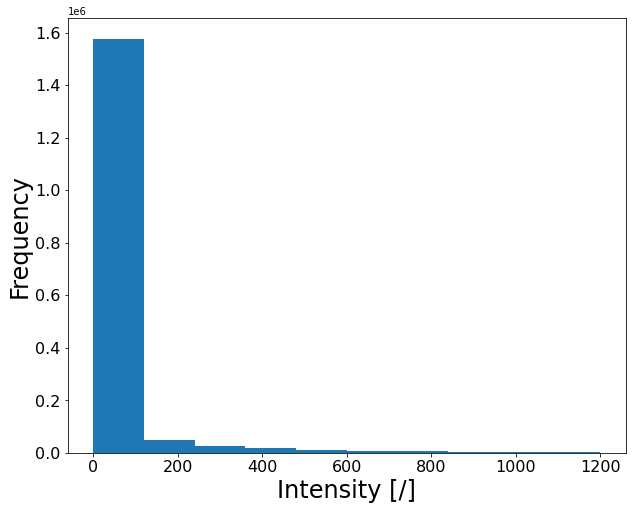

In [29]:
fig = plt.figure(figsize=(10, 8))
plt.hist(average_ravel[average_ravel < 1200])
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Intensity [/]', fontsize=24)
plt.tick_params(labelsize=16)
#fig.savefig('../../thesis/chap5/figure/diffraction_average_histogram.png')

In [30]:
# 15枚全体でのダークフレームのランダムエラーについての話

variance = np.mean((diffractions - average)**2, axis=0)
deviation = np.sqrt(variance)

print(np.max(deviation))
print(np.min(deviation))
print(np.mean(deviation))
print(np.median(deviation))
print(math.sqrt(np.mean(np.abs(deviation - np.mean(deviation))**2)))

3486.5939253087677
0.0
17.563713476911328
12.051002724531543
61.20534518317634


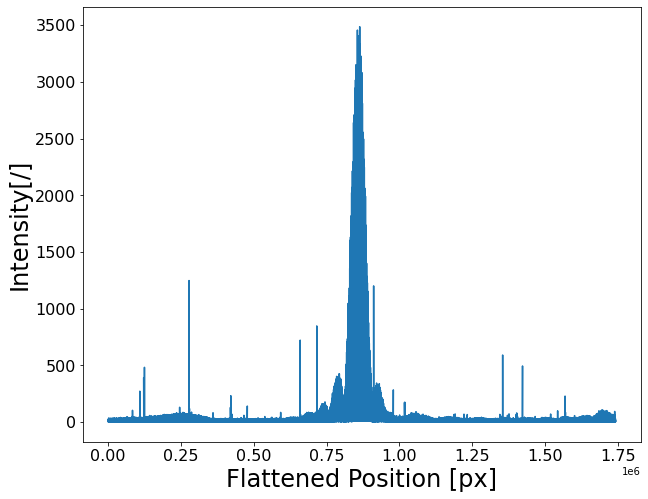

In [35]:
fig = plt.figure(figsize=(10, 8))
deviation_ravel = deviation.ravel()
plt.plot(deviation_ravel)
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/diffraction_deviation_ravel.png')

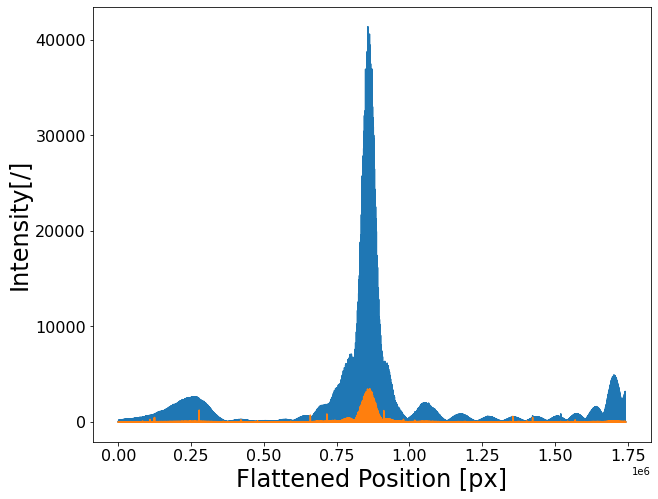

In [36]:
fig = plt.figure(figsize=(10, 8))
deviation_ravel = deviation.ravel()
plt.plot(average_ravel)
plt.plot(deviation_ravel)
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
#fig.savefig('../../thesis/chap5/figure/diffraction_deviation_average_comparison.png')

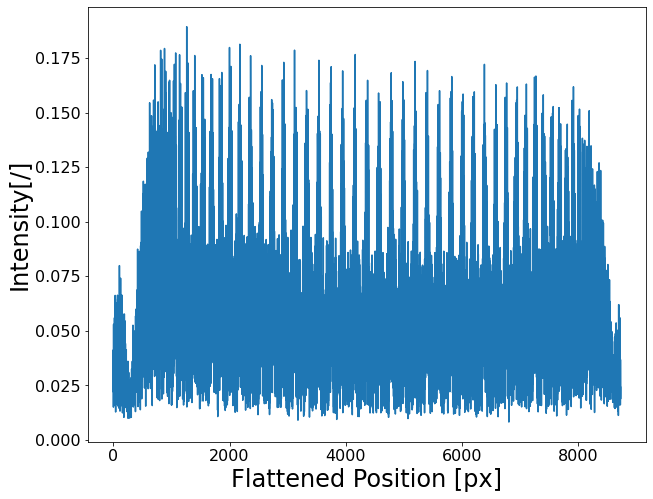

In [41]:
fig = plt.figure(figsize=(10, 8))
deviation_ravel = deviation.ravel()
plt.plot(deviation_ravel[average_ravel > 5000] / average_ravel[average_ravel > 5000])
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
#fig.savefig('../../thesis/chap5/figure/diffraction_deviation_average_comparison.png')

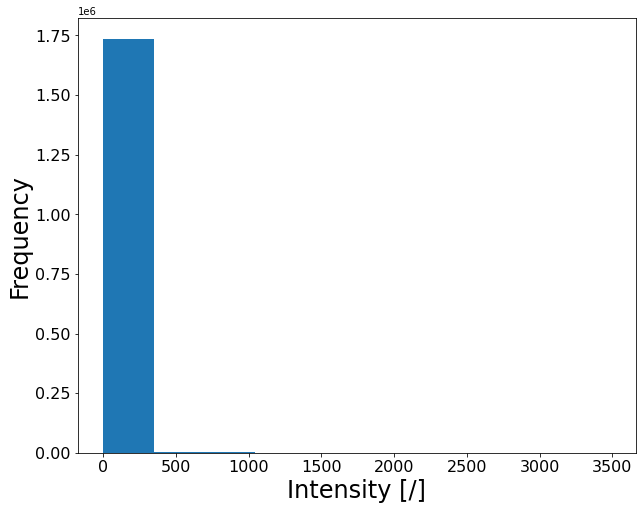

In [34]:
fig = plt.figure(figsize=(10, 8))
#plt.hist(deviation_ravel[deviation_ravel < 50])
plt.hist(deviation_ravel)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Intensity [/]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/diffraction_deviation_histogram.png')

In [42]:
for diffraction in diffractions:
    print(diffraction.ravel()[np.argmax(deviation)])

29674
29069
22237
30663
31118
25882
25021
29505
25303
27967
25511
19456
30459
30292
22453


In [43]:
for diffraction in diffractions:
    print(np.mean(diffraction))

134.68453856749312
134.153084825528
135.97249311294766
134.3356410697888
135.61746728650138
134.27120523415977
135.3302743342516
134.75917470156108
135.18220041322314
136.2918686868687
134.2381737832874
135.55684687786962
134.43070534894397
135.32439967860424
136.13408000459137


In [14]:
#average[average > 30000]
deviation[average > 10000] / average[average > 10000]

array([0.0119959 , 0.01195565, 0.01194359, ..., 0.01133116, 0.01577704,
       0.01427921])